# LSTM

## 【事前準備】

In [1]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip install h5py==2.10
# !pip install keras==2.2.4
# !pip install keras-applications==1.0.7
# !pip install tensorflow==1.14
# !pip install -q -U albumentations   # データ拡張用ライブラリ
!pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [1]:
## モジュールのインポート ##
# 一般
import os
import glob
import re
import xml.etree.ElementTree as ET
import random
import math
import collections
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
import graphviz
import pydotplus
# from IPython.display import Image
# from sklearn.externals.six import StringIO
# TensorFlow
import tensorflow as tf
# Keras
# from keras.datasets import mnist
# SciPy
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, lil_matrix
# 画像データ編集
from PIL import Image
import cv2
import albumentations as A
# 自然言語処理
from gensim.models import Word2Vec
# その他
from google.colab import drive #GoogleDriveモジュール
# drive.mount('/content/drive') #GoogleDriveのマウント
# os.chdir('/content/drive/My Drive/DIVE INTO CODE/Sprint/Sprint17/ObjectDetection-master')

### ●plot_training_curve関数

In [3]:
def plot_training_curve(history, metrics_list=["accuracy"]):
    for metrics in metrics_list:
        score = history.history[metrics]
        val_score = history.history['val_' + str(metrics)]

        # plt.figure(figsize=(8, 8))
        plt.figure()
        # plt.subplot(1, 2, 1)
        plt.plot(score, label=('Training ' + str(metrics)))
        plt.plot(val_score, label=('Validation ' + str(metrics)))
        plt.legend(loc='lower right')
        plt.title(('Training and Validation ' + str(metrics)))

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure()
    # plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


keras-apache-mxnet/imdb_lstm.py at master · awslabs/keras-apache-mxnet


ConvLSTM2Dのサンプルコード


keras-apache-mxnet/conv_lstm.py at master · awslabs/keras-apache-mxnet


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。すべて実行する上での実行時間を考慮した数に設定してください。

### ●SimpleRNNのサンプルコード

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 74s 92ms/step - loss: 0.6906 - accuracy: 0.5367 - val_loss: 0.6529 - val_accuracy: 0.6251
Epoch 2/5
782/782 [==============================] - 73s 93ms/step - loss: 0.5278 - accuracy: 0.7353 - val_loss: 0.4867 - val_accuracy: 0.7923
Epoch 3/5
782/782 [==============================] - 72s 93ms/step - loss: 0.4331 - accuracy: 0.8090 - val_loss: 0.5574 - val_accuracy: 0.7588
Epoch 4/5
782/782 [==============================] - 72s 92ms/step - loss: 0.3964 - accuracy: 0.8266 - val_loss: 0.6352 - val_accuracy: 0.7466
Epoch 5/5
782/782 [==============================] - 9s 12ms/step - loss: 0.5696 - accuracy: 0.7429
Test score: 0.5696142315864563
Test accuracy: 0.7428799867630005


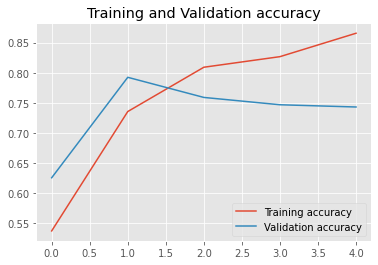

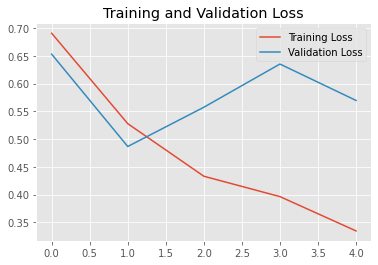

In [5]:
'''Trains an LSTM model on the IMDB sentiment classification task.

The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.

# Notes

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# 学習曲線
plot_training_curve(history=history, metrics_list=["accuracy"])

### ●GRUのサンプルコード

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 219s 276ms/step - loss: 0.4446 - accuracy: 0.7838 - val_loss: 0.3541 - val_accuracy: 0.8481
Epoch 2/5
782/782 [==============================] - 214s 274ms/step - loss: 0.2445 - accuracy: 0.9026 - val_loss: 0.3581 - val_accuracy: 0.8424
Epoch 3/5
782/782 [==============================] - 216s 277ms/step - loss: 0.1400 - accuracy: 0.9477 - val_loss: 0.4314 - val_accuracy: 0.8356
Epoch 4/5
782/782 [==============================] - 215s 274ms/step - loss: 0.0739 - accuracy: 0.9739 - val_loss: 0.7051 - val_accuracy: 0.8256
Epoch 5/5
782/782 [==============================] - 22s 28ms/step - loss: 0.6594 - accuracy: 0.8236
Test score: 0.6594348549842834
Test accuracy: 0.8235999941825867


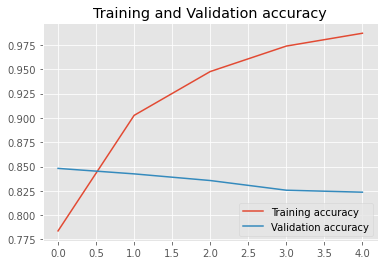

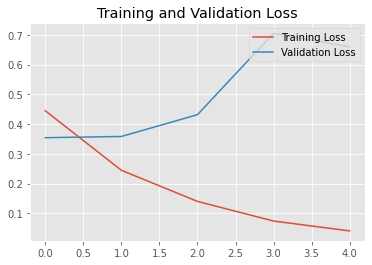

In [7]:
'''Trains an LSTM model on the IMDB sentiment classification task.

The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.

# Notes

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# 学習曲線
plot_training_curve(history=history, metrics_list=["accuracy"])

### ●CuDNNGRUのサンプルコード

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 24s 30ms/step - loss: 0.4270 - accuracy: 0.7968 - val_loss: 0.3533 - val_accuracy: 0.8438
Epoch 2/5
782/782 [==============================] - 22s 29ms/step - loss: 0.2330 - accuracy: 0.9075 - val_loss: 0.3817 - val_accuracy: 0.8402
Epoch 3/5
782/782 [==============================] - 22s 28ms/step - loss: 0.1309 - accuracy: 0.9507 - val_loss: 0.4415 - val_accuracy: 0.8324
Epoch 4/5
782/782 [==============================] - 22s 28ms/step - loss: 0.0674 - accuracy: 0.9769 - val_loss: 0.6195 - val_accuracy: 0.8300
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.7865 - accuracy: 0.8226
Test score: 0.7865477204322815
Test accuracy: 0.8226000070571899


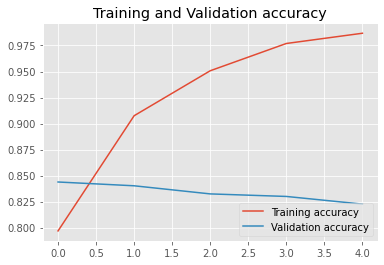

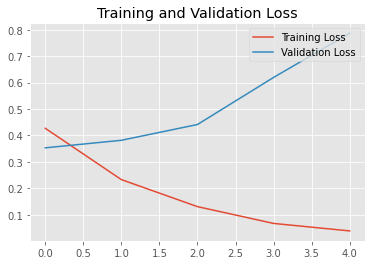

In [4]:
'''Trains an LSTM model on the IMDB sentiment classification task.

The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.

# Notes

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, CuDNNGRU
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(CuDNNGRU(128))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# 学習曲線
plot_training_curve(history=history, metrics_list=["accuracy"])

### ●LSTMのサンプルコード

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 250s 316ms/step - loss: 0.4344 - accuracy: 0.7960 - val_loss: 0.3826 - val_accuracy: 0.8317
Epoch 2/5
782/782 [==============================] - 246s 315ms/step - loss: 0.2546 - accuracy: 0.8986 - val_loss: 0.4020 - val_accuracy: 0.8267
Epoch 3/5
782/782 [==============================] - 247s 316ms/step - loss: 0.1650 - accuracy: 0.9378 - val_loss: 0.4337 - val_accuracy: 0.8285
Epoch 4/5
782/782 [==============================] - 248s 317ms/step - loss: 0.1115 - accuracy: 0.9592 - val_loss: 0.5084 - val_accuracy: 0.8276
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.5888 - accuracy: 0.8212
Test score: 0.5888245701789856
Test accuracy: 0.8212000131607056


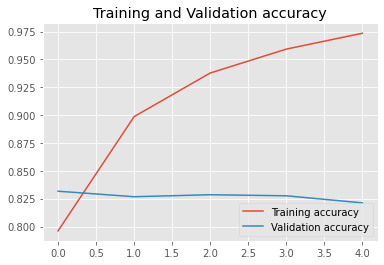

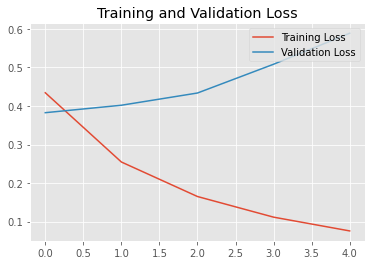

In [9]:
'''Trains an LSTM model on the IMDB sentiment classification task.

The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.

# Notes

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# 学習曲線
plot_training_curve(history=history, metrics_list=["accuracy"])

In [10]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

### ●ConvLSTM2Dのサンプルコード

95/95 [==============================] - 2247s 24s/step - loss: 0.7821 - val_loss: 0.7214


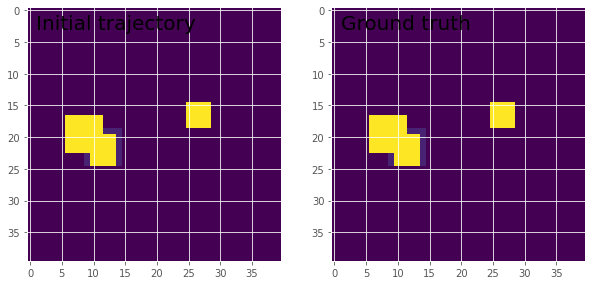

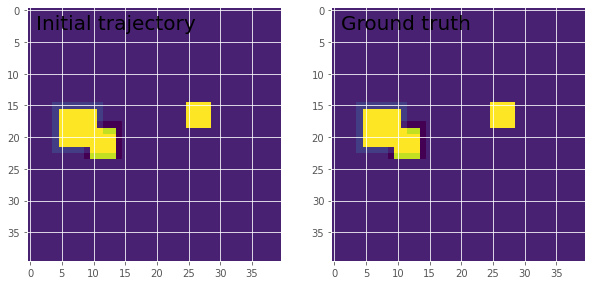

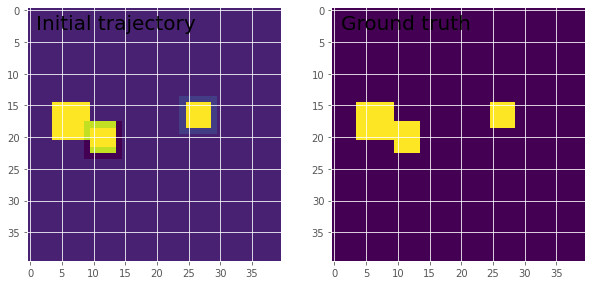

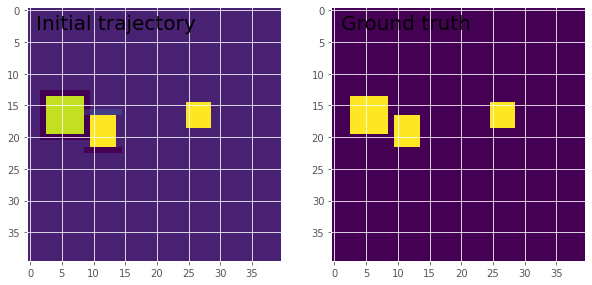

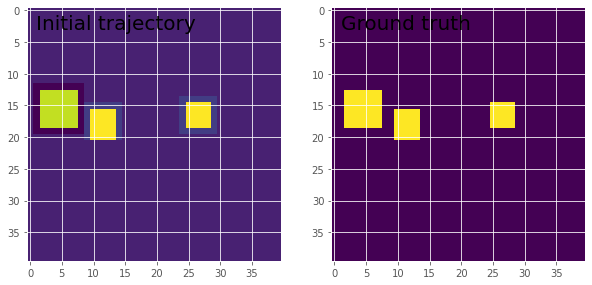

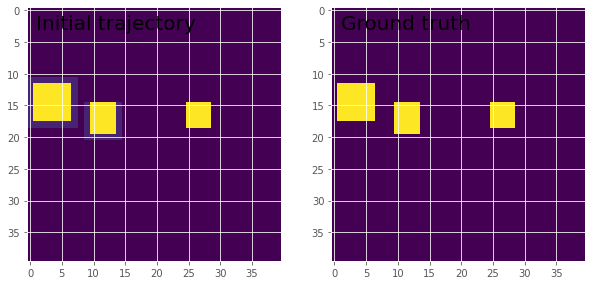

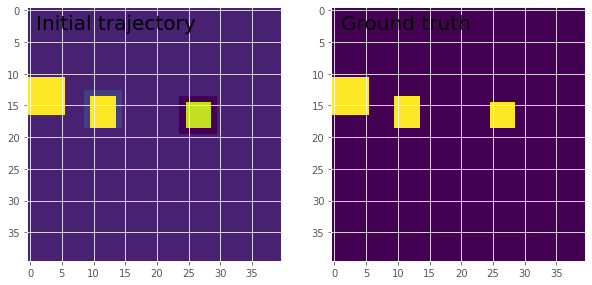

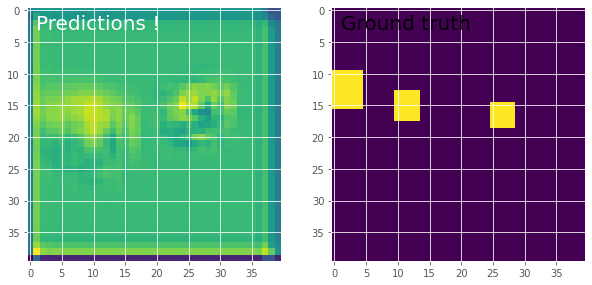

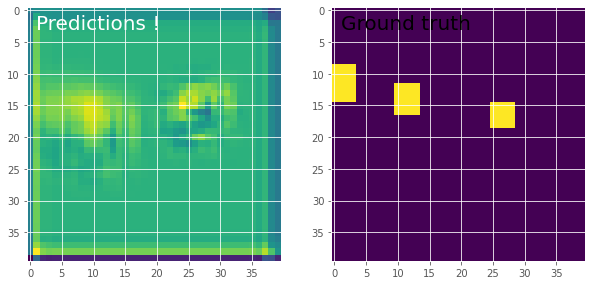

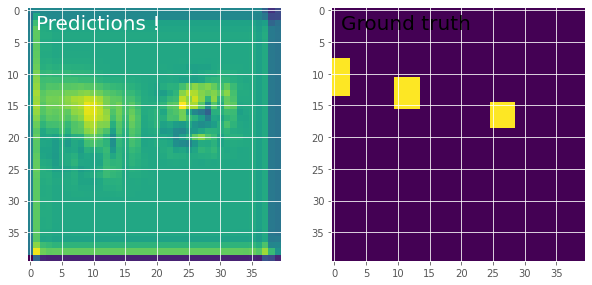

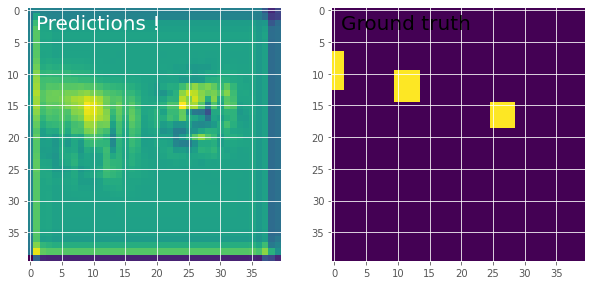

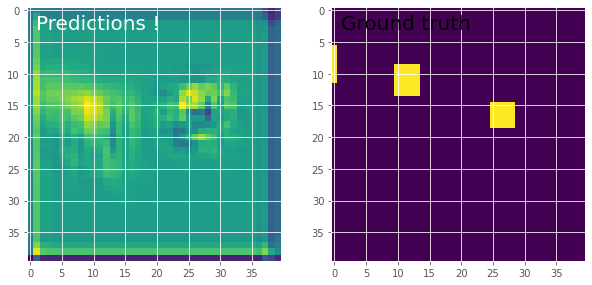

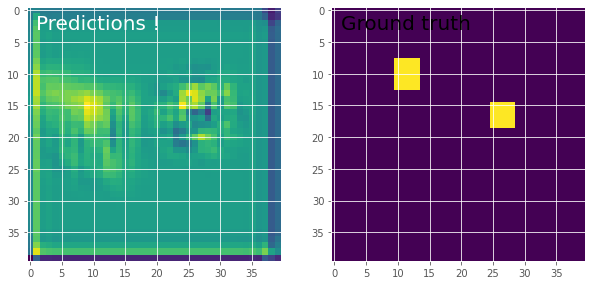

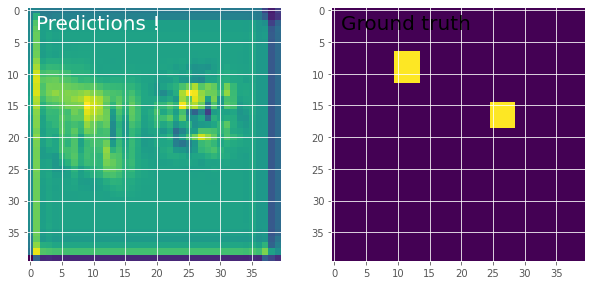

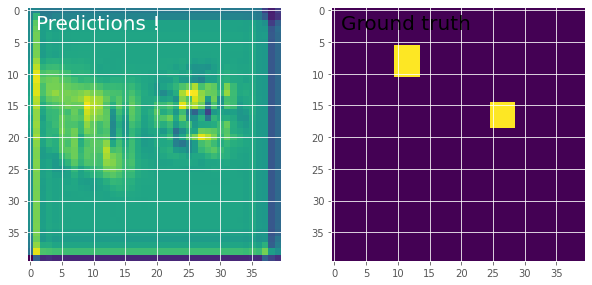

In [ ]:
""" This script demonstrates the use of a convolutional LSTM network.

This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=1, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### 【問題1 解答】
各RNNレイヤを用いて学習させたときのそれぞれの正解率(accuracy)は下記の通り。

- SimpleRNN:  0.7428799867630005
- GRU:  0.8235999941825867
- LSTM:  0.8212000131607056

上記の通り、GRUやLSTMの性能はほぼ同等であり、高い推定精度を実できていることがわかる。

## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


データセット - Keras Documentation


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

### 【問題3 解答】
- RNN

```
以降で説明するビルトインのセルやカスタマイズ実装したセルなど、任意のセルインスタンスを含むRNNレイヤ。
複数のタイムステップのデータ（シーケンスデータ）と前タイムステップの隠れ状態を入力に取って再帰処理を行う。
以降で述べるセルと異なり、引数には各セルを与えて使用する。
```

- SimpleRNNCell

```
前のタイムステップの出力を隠れ状態として使用するRNN（SimpleRNN）のセル。
RNNと異なり、SimpleRNNCellでは単一のタイムステップの入力データを扱う。
```

- GRUCell

```
前タイムステップから隠れ状態を受け取った後、セルの中のゲートを通じて状態が取捨選択された上で次のタイムステップへ受け渡されるセル。
長いシーケンスデータを扱う場合は、SimpleRNNCellよりも長期記憶を可能とするこちらの方が適している。
```

- LSTMCell

```
GRUと異なり、前後のタイムステップのセルに受け渡す隠れ状態として、短期記憶状態h(t)と長期記憶状態c(t)の2種類を持つ。
c(t)は忘却ゲートで一部の記憶が除去されたり入力ゲートから入ってきたデータをc(t)に加えたりされ、
以降のタイムステップへ渡されていく。
```

- StackedRNNCells

```
複数のセルを単一のセルとして扱えるようにするためのラッパー。
```

- CuDNNGRU

```
NVIDIAのGPUアクセラレーションライブラリであるCuDNNを用いたGRU。通常のGRUに比べて高速に動作。
```

- CuDNNLSTM

```
NVIDIAのGPUアクセラレーションライブラリであるCuDNNを用いたLSTM。通常のLSTMに比べて高速に動作。
```

## 【おまけ】